## Multiclass classification. Dry Bean dataset.

### 1. Data loading and Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler


In [2]:
arff_file = arff.loadarff('Dry_Bean_Dataset.arff')
df = pd.DataFrame(arff_file[0])

In [3]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395.0,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,b'SEKER'
1,28734.0,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,b'SEKER'
2,29380.0,624.110,212.826130,175.931143,1.209713,0.562727,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,b'SEKER'
3,30008.0,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,b'SEKER'
4,30140.0,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,b'SEKER'


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  float64
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  float64
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [5]:
# Check for 0 values

(df == 0).sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [3]:
df.rename(columns={'AspectRation': 'AspectRatio'}, inplace=True)

Variable *Class* is my target variable. Checking how many classes do I have in my data and the spread of classes:

In [4]:
df['Class'].value_counts()

Class
b'DERMASON'    3546
b'SIRA'        2636
b'SEKER'       2027
b'HOROZ'       1928
b'CALI'        1630
b'BARBUNYA'    1322
b'BOMBAY'       522
Name: count, dtype: int64

In [5]:
# I don't like the format of the values in the column Class. Decided to transform these values into str format

df['Class'] = df['Class'].str.decode('utf-8')

In [9]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [6]:
# Split data to labels and features

labels = df["Class"]
features = df.drop("Class", axis=1)

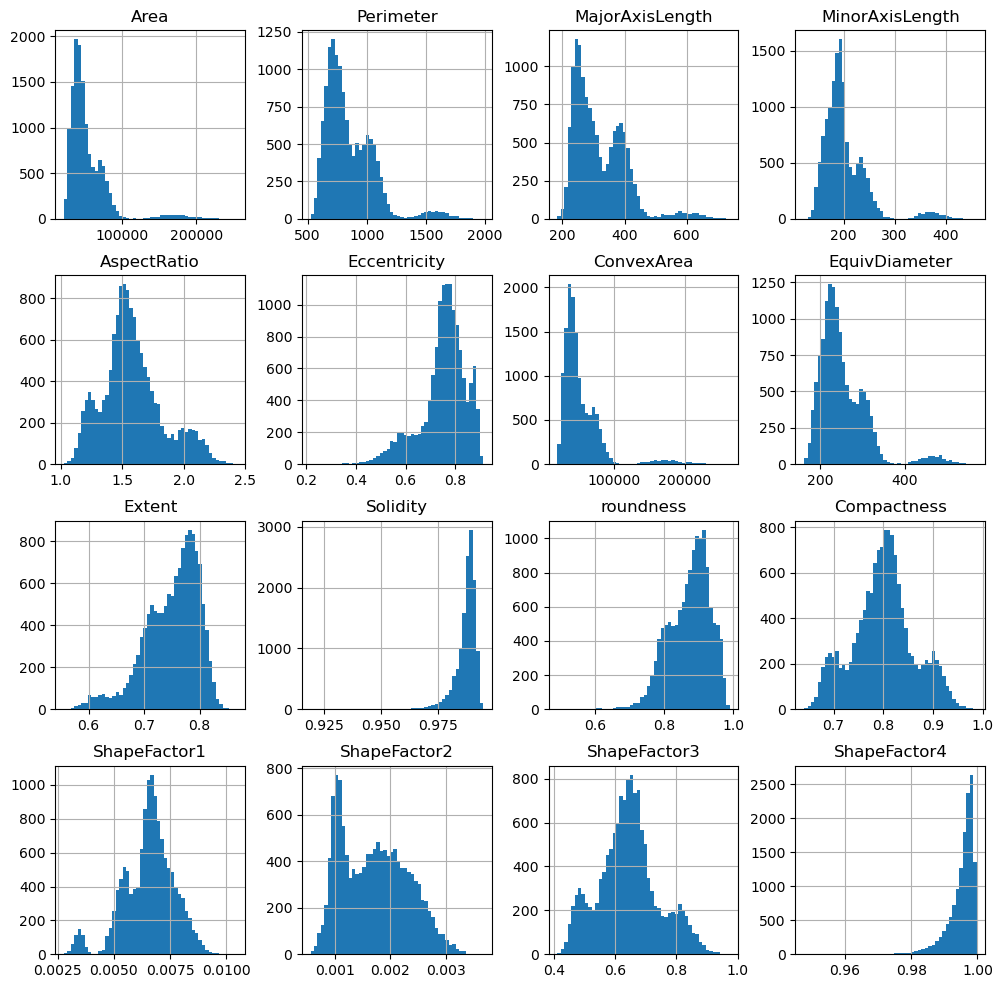

In [11]:
df.hist(bins=50, figsize=(12, 12))
plt.show()

Creating a density matrix (density plot)

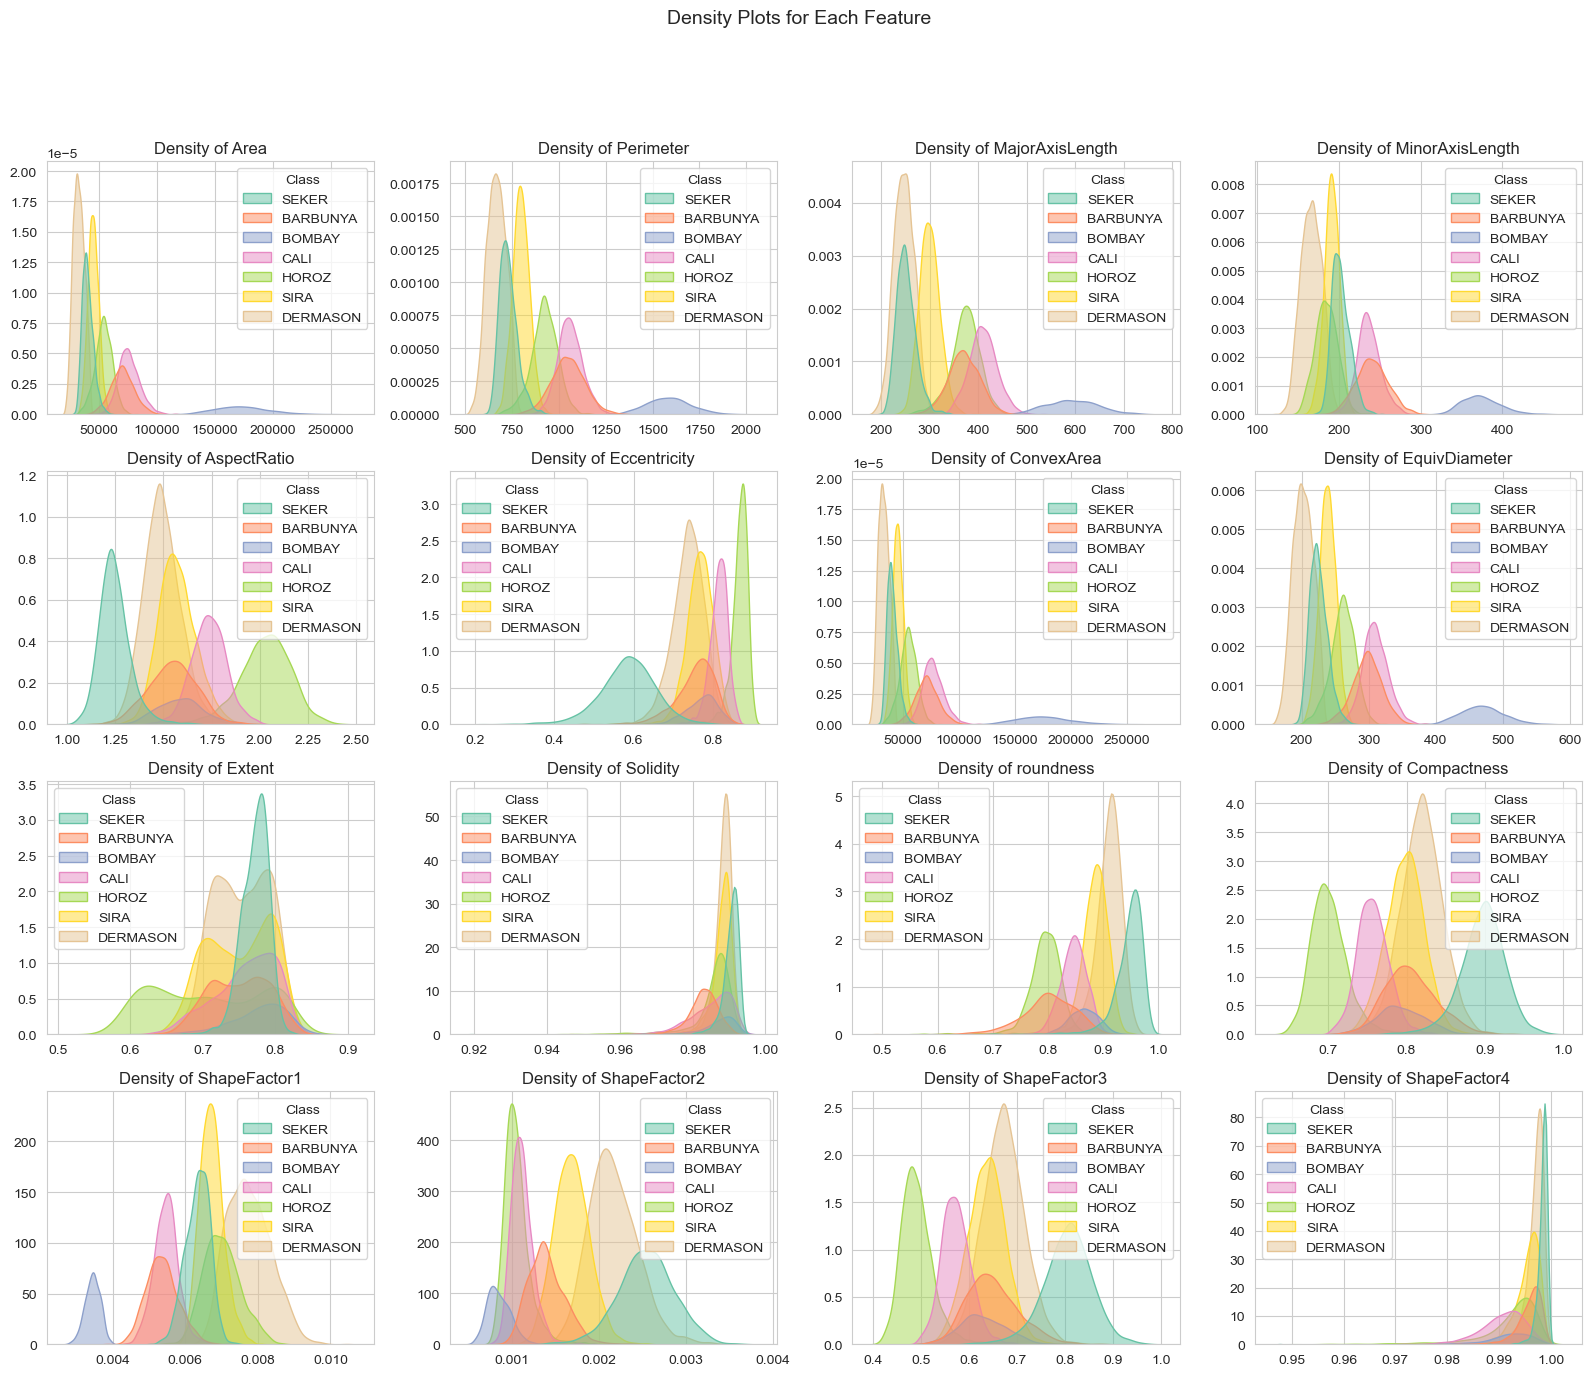

In [12]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 14))  
fig.suptitle('Density Plots for Each Feature', fontsize=14)

axes = axes.flatten()

for i, feature in enumerate(features.columns):  
    sns.kdeplot(data=df, x=feature, hue="Class", fill=True, ax=axes[i], palette="Set2", alpha=0.5)
    axes[i].set_title(f'Density of {feature}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout(rect=(0, 0, 1, 0.92))
plt.show()

Splitting Dataset into training, validation, and test sets.

In [7]:
# Split into training (80%) and test (20%) sets using Stratified Sampling

X_train, X_test, y_train, y_test = train_test_split(
    features, 
    labels, 
    test_size=0.20,
    random_state=42, 
    stratify=labels 
)

In [14]:
# Split training data into Training (90%) and Validation (10%) sets

train_features, val_features, train_labels, val_labels = train_test_split(
    X_train,
    y_train,
    test_size=0.10,
    random_state=42,
    stratify=y_train
)

Data transformation pipeline 

In [8]:
def log_transform(x):
    return np.log(x)

log_transformer = FunctionTransformer(log_transform)

def boxcox_transform(x):
    if isinstance(x, pd.DataFrame):
        x = x.values

    x_positive = x + 0.1 
    x_transformed = np.zeros_like(x_positive)
    
    for i in range(x.shape[1]):
        x_transformed[:, i], _ = stats.boxcox(x_positive[:, i])
    return x_transformed

boxcox_transformer = FunctionTransformer(boxcox_transform)

log_columns = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 
               'ConvexArea', 'EquivDiameter']

boxcox_columns = ['Eccentricity', 'Solidity', 'roundness', 'ShapeFactor4']

preprocessor = ColumnTransformer(
    transformers=[
        ('log', log_transformer, log_columns),
        ('boxcox', boxcox_transformer, boxcox_columns),],
    remainder='passthrough')

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
])


Applying the Pipeline:
* Fit and transform tarin_features
* Transform val_features and test_features 

In [16]:
pipeline.fit(train_features)
train_features_transformed = pipeline.transform(train_features)

In [17]:
val_features_transformed = pipeline.transform(val_features)
test_features_transformed = pipeline.transform(X_test)

Checking histograms for transformed train_features

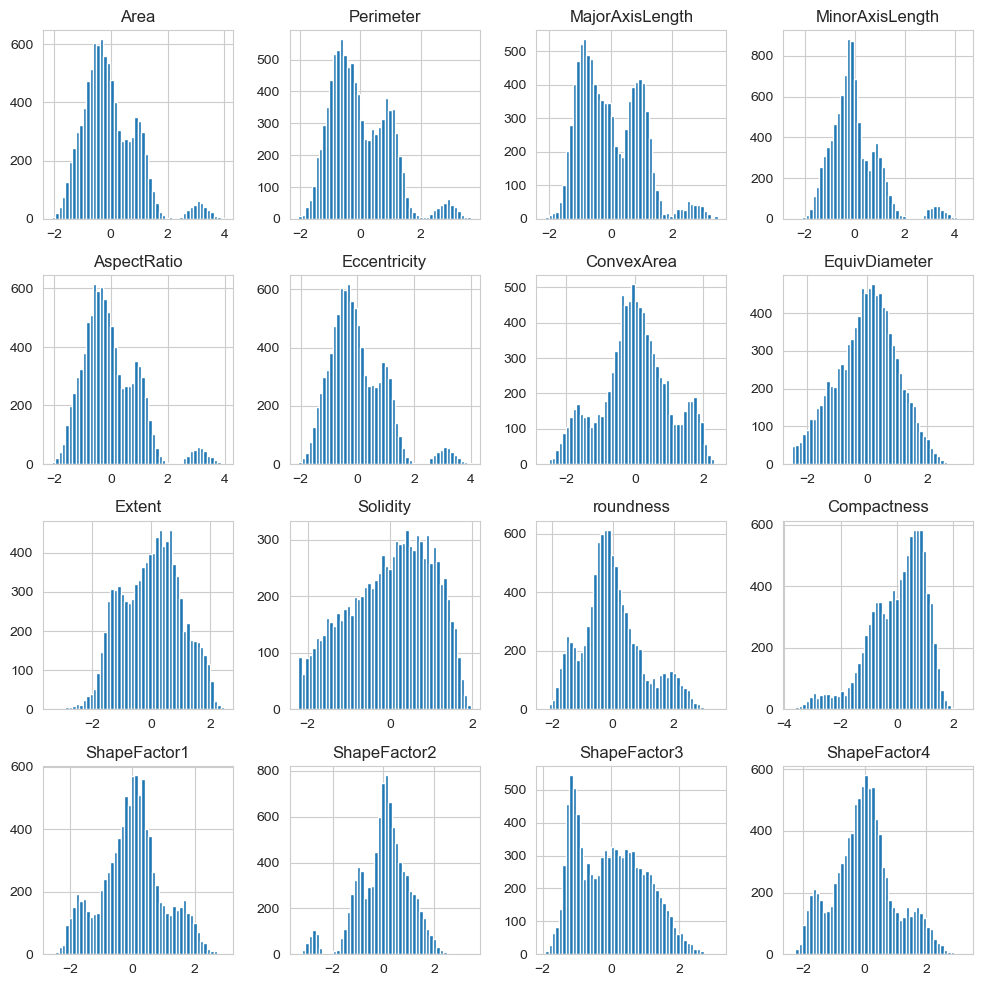

In [18]:
column_names = train_features.columns
train_features_transformed_df = pd.DataFrame(train_features_transformed, columns=column_names)

train_features_transformed_df.hist(bins=50, figsize=(12, 12))
plt.show()

Training and validating different classifiers using train_features_transformed and val_features_transformed

In [13]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV


In [20]:
svm_clf = SVC(kernel='linear')  
dt_clf = DecisionTreeClassifier(random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=10)

In [21]:
svm_clf.fit(train_features_transformed, train_labels)
dt_clf.fit(train_features_transformed, train_labels)
knn_clf.fit(train_features_transformed, train_labels)

KNeighborsClassifier(n_neighbors=10)

In [22]:
svm_predictions = svm_clf.predict(val_features_transformed)
dt_predictions = dt_clf.predict(val_features_transformed)
knn_predictions = knn_clf.predict(val_features_transformed)

In [23]:
print("SVM Accuracy:", accuracy_score(val_labels, svm_predictions))
print("Decision Tree Accuracy:", accuracy_score(val_labels, dt_predictions))
print("KNN Accuracy:", accuracy_score(val_labels, knn_predictions))

# Detailed classification report
print("\nClassification Report for SVM:")
print(classification_report(val_labels, svm_predictions))

print("Classification Report for Decision Tree:")
print(classification_report(val_labels, dt_predictions))

print("Classification Report for KNN:")
print(classification_report(val_labels, knn_predictions))

SVM Accuracy: 0.9219467401285583
Decision Tree Accuracy: 0.8879706152433425
KNN Accuracy: 0.9247015610651974

Classification Report for SVM:
              precision    recall  f1-score   support

    BARBUNYA       0.99      0.87      0.92       106
      BOMBAY       1.00      1.00      1.00        42
        CALI       0.92      0.95      0.94       130
    DERMASON       0.90      0.92      0.91       284
       HOROZ       0.94      0.98      0.96       154
       SEKER       0.99      0.92      0.95       162
        SIRA       0.85      0.88      0.86       211

    accuracy                           0.92      1089
   macro avg       0.94      0.93      0.94      1089
weighted avg       0.92      0.92      0.92      1089

Classification Report for Decision Tree:
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.83      0.88       106
      BOMBAY       1.00      1.00      1.00        42
        CALI       0.88      0.92      0.89       130
    

Adding two more classifiers: Random Forest and Multi_layer Perceptron.

In [24]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,),
                        max_iter=500,
                        activation='relu',
                        solver='adam',
                        random_state=42)

In [25]:
rf_clf.fit(train_features_transformed, train_labels)
mlp_clf.fit(train_features_transformed, train_labels)

MLPClassifier(max_iter=500, random_state=42)

In [26]:
rf_predictions = rf_clf.predict(val_features_transformed)
mlp_predictions = mlp_clf.predict(val_features_transformed)

In [27]:
print("Random Forest Accuracy:", accuracy_score(val_labels, rf_predictions))
print("MLP Neural Network Accuracy:", accuracy_score(val_labels, mlp_predictions))

# Detailed classification reports
print("\nClassification Report for Random Forest:")
print(classification_report(val_labels, rf_predictions))

print("Classification Report for MLP Neural Network:")
print(classification_report(val_labels, mlp_predictions))

Random Forest Accuracy: 0.9393939393939394
MLP Neural Network Accuracy: 0.9274563820018366

Classification Report for Random Forest:
              precision    recall  f1-score   support

    BARBUNYA       0.98      0.88      0.93       106
      BOMBAY       1.00      1.00      1.00        42
        CALI       0.93      0.95      0.94       130
    DERMASON       0.94      0.93      0.94       284
       HOROZ       0.94      0.98      0.96       154
       SEKER       1.00      0.96      0.98       162
        SIRA       0.87      0.91      0.89       211

    accuracy                           0.94      1089
   macro avg       0.95      0.95      0.95      1089
weighted avg       0.94      0.94      0.94      1089

Classification Report for MLP Neural Network:
              precision    recall  f1-score   support

    BARBUNYA       0.99      0.89      0.94       106
      BOMBAY       1.00      1.00      1.00        42
        CALI       0.94      0.96      0.95       130
    DER

Having assessed the F1 score, I chose SVM, RF and MLP for the further Hyper-parameter tuning step

### Random Forest model tuning

In [9]:
pipeline.fit(X_train)
X_train_transformed = pipeline.transform(X_train)

In [10]:
X_test_transformed = pipeline.transform(X_test)

In [30]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_features": ["sqrt", "log2"],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [31]:
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  
    scoring="f1_weighted", 
    verbose=1
)

In [32]:
grid_search.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1_weighted', verbose=1)

In [33]:
grid_search.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [34]:
grid_search.best_score_

np.float64(0.9271293493301794)

In [35]:
best_model = grid_search.best_estimator_

In [36]:
rf_predictions = best_model.predict(X_test_transformed)

In [39]:
print("RF Accuracy:", accuracy_score(y_test, rf_predictions))

print("\nClassification Report for RF:")
print(classification_report(y_test, rf_predictions, digits=4))

RF Accuracy: 0.9125964010282777

Classification Report for RF:
              precision    recall  f1-score   support

    BARBUNYA     0.9228    0.9019    0.9122       265
      BOMBAY     1.0000    1.0000    1.0000       104
        CALI     0.9437    0.9264    0.9350       326
    DERMASON     0.8884    0.9210    0.9044       709
       HOROZ     0.9608    0.9534    0.9571       386
       SEKER     0.9097    0.9680    0.9379       406
        SIRA     0.8694    0.8083    0.8378       527

    accuracy                         0.9126      2723
   macro avg     0.9278    0.9256    0.9263      2723
weighted avg     0.9124    0.9126    0.9121      2723



### Multi-layer perceptron model tuning

In [11]:
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 100), (100, 100, 100)],
    'activation': ['relu', 'tanh'], 
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01]
}

In [14]:
grid_search = GridSearchCV(
    estimator=MLPClassifier(
        hidden_layer_sizes=(100,),
        max_iter=1000,
        random_state=42
    ),
    param_grid=param_grid,
    cv=5,  
    scoring="f1_weighted", 
    verbose=2
)

In [15]:
grid_search.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=sgd; total time=   2.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=sgd; total time=   2.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=sgd; total time=   2.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=sgd; total time=   3.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=sgd; total time=   3.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=adam; total time=   3.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=adam; total time=   4.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), l

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=sgd; total time= 1.1min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=sgd; total time= 1.1min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=sgd; total time= 1.1min
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=sgd; total time=  24.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=adam; total time=   8.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=adam; total time=   7.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=adam; total time=   7.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=adam; total time=   9.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=adam; total time=   8.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solv

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=sgd; total time= 2.1min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=sgd; total time= 2.1min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=sgd; total time= 2.2min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=sgd; total time= 2.2min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=sgd; total time= 2.3min
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=adam; total time=  10.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=adam; total time=   9.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=adam; total time=   9.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=adam; total time=  14.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=adam; total time=  12.8s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=sgd; total time=   3.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate_

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=sgd; total time= 1.1min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=sgd; total time= 1.1min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=sgd; total time= 1.2min
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=sgd; total time=  27.1s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=adam; total time=   8.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=adam; total time=   7.8s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=adam; total time=   8.4s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=adam; total time=   9.1s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=adam; total time=   8.9s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, solver=sgd; 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=sgd; total time= 2.3min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=sgd; total time= 2.2min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=sgd; total time= 2.2min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=sgd; total time= 2.3min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=sgd; total time= 2.3min
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=adam; total time=  10.5s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=adam; total time=  10.4s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=adam; total time=  12.7s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=adam; total time=  10.4s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=adam; total time=  10.7s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=sgd; total time=   3.0s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.0

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=sgd; total time= 1.3min
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=sgd; total time=  32.6s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=sgd; total time=  29.0s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=sgd; total time=  29.5s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=adam; total time=  10.7s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=adam; total time=   7.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=adam; total time=   6.8s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=adam; total time=   5

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=sgd; total time= 2.4min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=sgd; total time= 2.4min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=sgd; total time= 2.3min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=sgd; total time= 2.4min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=sgd; total time= 2.3min
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=adam; total time=  10.7s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=adam; total time=   7.3s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=adam; total time=   8.8s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=adam; total time=  11.9s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.01, solver=adam; total time=   9.4s


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000, random_state=42),
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(100,), (100, 100),
                                                (100, 100, 100)],
                         'learning_rate_init': [0.001, 0.01],
                         'solver': ['sgd', 'adam']},
             scoring='f1_weighted', verbose=2)

In [16]:
grid_search.best_params_

{'activation': 'relu',
 'alpha': 0.01,
 'hidden_layer_sizes': (100,),
 'learning_rate_init': 0.01,
 'solver': 'sgd'}

In [17]:
grid_search.best_score_

np.float64(0.9341828327689164)

In [18]:
best_model = grid_search.best_estimator_

In [19]:
mlp_predictions = best_model.predict(X_test_transformed)

In [20]:
print("RF Accuracy:", accuracy_score(y_test, mlp_predictions))

print("\nClassification Report for RF:")
print(classification_report(y_test, mlp_predictions, digits=4))

RF Accuracy: 0.914799853103195

Classification Report for RF:
              precision    recall  f1-score   support

    BARBUNYA     0.9182    0.9321    0.9251       265
      BOMBAY     1.0000    1.0000    1.0000       104
        CALI     0.9556    0.9233    0.9392       326
    DERMASON     0.9099    0.9111    0.9105       709
       HOROZ     0.9682    0.9456    0.9567       386
       SEKER     0.8639    0.9852    0.9206       406
        SIRA     0.8825    0.8121    0.8458       527

    accuracy                         0.9148      2723
   macro avg     0.9283    0.9299    0.9283      2723
weighted avg     0.9157    0.9148    0.9143      2723



### SVM model tuning

In [21]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale'],
    'kernel': ['linear', 'rbf', 'poly']
}

In [22]:
grid_search = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=param_grid,
    cv=5,  
    scoring="f1_weighted", 
    verbose=2
)

In [23]:
grid_search.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.3s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.2s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.2s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.2s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.2s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   2.1s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   2.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   2.1s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   2.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   2.1s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   2.0s
[CV] END ....................C=0.1, gamma=0.001

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 'scale'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='f1_weighted', verbose=2)

In [24]:
grid_search.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [25]:
grid_search.best_score_

np.float64(0.9342404015823723)

In [26]:
best_model = grid_search.best_estimator_

In [27]:
svm_predictions = best_model.predict(X_test_transformed)

In [28]:
print("RF Accuracy:", accuracy_score(y_test, svm_predictions))

print("\nClassification Report for RF:")
print(classification_report(y_test, svm_predictions, digits=4))

RF Accuracy: 0.9136981270657363

Classification Report for RF:
              precision    recall  f1-score   support

    BARBUNYA     0.9182    0.9321    0.9251       265
      BOMBAY     1.0000    1.0000    1.0000       104
        CALI     0.9558    0.9294    0.9425       326
    DERMASON     0.9034    0.9097    0.9065       709
       HOROZ     0.9684    0.9534    0.9608       386
       SEKER     0.8602    0.9852    0.9185       406
        SIRA     0.8882    0.7989    0.8412       527

    accuracy                         0.9137      2723
   macro avg     0.9277    0.9298    0.9278      2723
weighted avg     0.9146    0.9137    0.9130      2723

